# 1)- Présentation du Projet

L'achat d'une assurance auto peut être une tâche ardue et nous voulons comprendre comment l'état civil influence la décision d'une personne d'acheter une assurance auto à la suite d'un appel téléphonique.

Ceci est un jeu de données d'une banque aux États-Unis. Outre les services habituels, cette banque fournit également des services de carassurance. La banque organise régulièrement des campagnes pour attirer de nouveaux clients. La banque dispose de données sur les clients potentiels. 

Les employés de la banque les appellent pour faire de la publicité pour les options d’assurance auto disponibles. 

Plisieurs informations générales sur les clients sont fournies(âge, emploi,,mariés, célibataires ou divorcés, etc.) ainsi que des informations plus spécifiques sur la campagne de vente d’assurance en cours (communication, dernier jour de contact) et les campagnes précédentes (attributs tels que tentatives précédentes, résultat d'appel si les clients ont souscrit ou non une assurance automobile à la suite de l'appel.).

Le jeu de données contient des données de 5000 clients ayant reçu des appels pour leur proposer des services d'assurance automobile. 

# 2)- Problème à résoudre


La banque souhaite utiliser les données sur ces clients potentiels en les appelant, en leur proposant ces service d'assurances automobile, afin de pouvoir y travailler et améliorer son activité. 

Le problème que je tente de résoudre implique des modèles prédictifs et le choix du meilleur modèle parmi ceux-ci. utiliser des techniques de validation de modèle pour mieux comprendre les facteurs clés qui contribuent au succès de ces appels et fournir des une solution pour améliorer également ces résultats. 

En outre, la mise en œuvre du modèle prédictif peut améliorer leurs activités et les aider à se concentrer sur les domaines clés de leur succès.

# 3)- Tableau du jeu de données

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">Voici les caractéristiques du jeu de données et la  description de chaque attribut / caractéristique ainsi, indique si les variables sont continues, catégoriques ou binaires..</span>

|Feature          | Description                                                           | Example                            |
|:----------------|:----------------------------------------------------------------------|:-----------------------------------|
|Id               | *ID Unique                                                            | de 1  … 5000 (taille du dataset)   |
|Age              | *Age du client                                                        |                                    |
|Job              | *Job du client                                                        | "admin.", "blue-collar", etc.      |
|Marital          | *Status matrimonial du client                                         | "divorced", "married", "single"    |
|Education        | *Niveau d'éducation du client                                         | "primary", "secondary", etc.       |
|Default          | *Le client a un credit par default?                                   | "yes" - 1,"no" - 0                 |
|Balance          | *Solde annuel moyen, en USD                                           |                                    |
|HHInsurance      | *Le ménage est-il assuré?                                             | "yes" - 1,"no" - 0                 |
|CarLoan          | *Le client a-t-il un prêt auto ?                                      | "yes" - 1,"no" - 0                 | 
|Communication    | *Type de communication de contact                                     | "cellular", "telephone", “NA”      |
|LastContactMonth | *Le mois du dernier contact                                           | "jan", "feb", etc.                 |
|LastContactDay   | *Le jour du dernier contact                                           |                                    |
|CallStart        | *Heure de début du dernier appel (HH:MM:SS)                           | 12:43:15                           |
|CallEnd          | *Heure de fin du dernier appel (HH:MM:SS)                             | 12:43:15                           |
|NoOfContacts     | *Nombre de contacts effectués lors de cette campagne pour ce client   |                                    |
|DaysPassed       | *Nombre de jours écoulés après le dernier contact du client d'une     |                                    |
|                 | campagne précédente (numérique; -1 signifie que le client n'a pas     |                                    |
|                 |   encore été contacté).                                               |                                    | 
|PrevAttempts     | *Nombre de contacts établis avant cette campagne et pour ce client    |                                    |
|Outcome          | *résultat de la campagne marketing précédente                         | "failure", "other", "success", “NA”|
|CarInsurance     | *Le client a-t-il souscrit une Assurance Auto?                        | "yes" - 1,"no" - 0                 |

# 4)- Exploration des données

In [2]:
# Importing Data Science Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


- Choisir l'ID de l'appel comme index des données à importer

In [3]:
# Reading Csv file
path='./data/'
df = pd.read_csv(path+'carInsurance_train.csv', encoding='utf8', sep=',')
df.set_index('Id')

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0
6,32,technician,single,tertiary,0,1625,0,0,cellular,22,may,1,109,1,failure,14:58:08,15:11:24,1
7,37,admin.,single,tertiary,0,1000,1,0,cellular,17,mar,1,-1,0,NaN,13:00:02,13:03:17,1
8,35,management,divorced,tertiary,0,538,1,0,NaN,12,may,4,-1,0,NaN,15:39:43,15:40:49,0
9,30,admin.,married,secondary,0,187,1,0,cellular,18,nov,1,-1,0,NaN,12:20:56,12:22:42,0


In [164]:
df.shape

(4000, 19)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
Id                  4000 non-null int64
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(11), object(8)
memory usage: 593.8+ KB


- Séries Numériques

In [169]:
# Columns in dataset
df.columns

Index(['Id', 'Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [170]:
# Statistics of numerical columns
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


En remarquant que queklques colonnes Numériques, ont des valeurs binaires ayant 0 'et 1'

In [171]:
# Datatypes of columns in dataset
df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

- Séries Catégoriques

In [172]:
df.select_dtypes(include=['object']).head()

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


In [69]:
# Statistics of categorical features
df.describe(include=['O'])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
count,4976,5000,4784,3877,5000,1201,5000,5000
unique,11,3,3,2,12,3,4640,4630
top,management,married,secondary,cellular,may,failure,11:31:43,11:30:21
freq,1114,2898,2489,3529,1318,548,3,3


In [173]:
df.select_dtypes(include=['int64','float64']).head()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0
1,2,32,0,1156,1,0,26,5,-1,0,0
2,3,29,0,637,1,0,3,1,119,1,1
3,4,25,0,373,1,0,11,2,-1,0,1
4,5,30,0,2694,0,0,3,1,-1,0,0


In [175]:
df.describe(include=['int64','float64'])

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


# Valeurs Manquantes

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
Les valeurs manquantes sont une préoccupation majeure dans l’analyse des données.
De plus, les modèles prédictifs ne peuvent être construits sans traiter les valeurs manquantes.</span>



In [90]:
#checking for missing values using isnull() method
df_new.isnull().sum()

Id                     0
Age                    0
Job                   24
Marital                0
Education            216
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication       1123
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3798
CallStart              0
CallEnd                0
CarInsurance        1000
dtype: int64

# Visualisation Univariée

In [99]:
attributs_numeriques = df.select_dtypes(include=['int64','float64'])


In [103]:
attributs_numeriques[0:5]

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
0,1,32,0,1218,1,0,28,2,-1,0,0.0
1,2,32,0,1156,1,0,26,5,-1,0,0.0
2,3,29,0,637,1,0,3,1,119,1,1.0
3,4,25,0,373,1,0,11,2,-1,0,1.0
4,5,30,0,2694,0,0,3,1,-1,0,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B83A7648D0>,
      dtype=object)

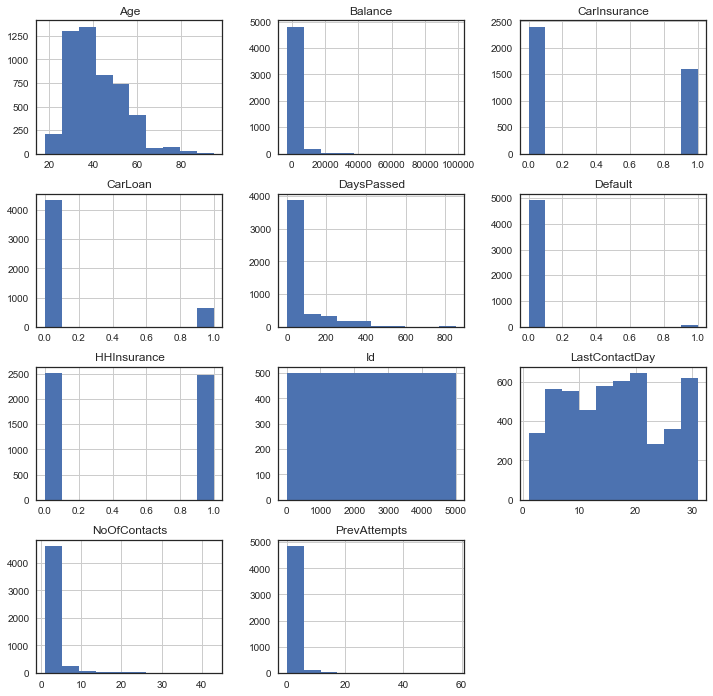

In [98]:
attributs_numeriques.hist(figsize=(12,12))

In [105]:
attributs_categoriques = df.select_dtypes(include=['object'])


In [107]:
attributs_categoriques[0:5]

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56


# Analyse / Visualisation Univariée

In [114]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Age'].value_counts())

32    225
31    217
33    217
34    207
36    196
35    193
30    185
37    178
38    159
39    152
29    142
43    140
40    133
45    131
41    129
46    125
27    118
49    117
47    114
44    114
28    113
42    113
48    100
52     97
53     94
50     94
56     92
57     91
51     90
26     86
     ... 
62     24
63     17
64     16
75     15
21     13
72     13
77     13
69     12
80     11
73     10
70     10
19     10
65      9
66      9
67      9
68      8
20      8
18      7
78      7
79      7
76      6
71      5
81      4
83      3
92      2
82      2
86      2
84      1
87      1
95      1
Name: Age, Length: 70, dtype: int64


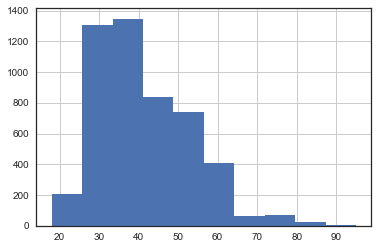

In [115]:
df['Age'].hist()

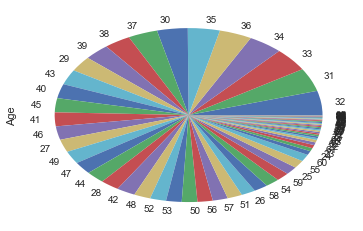

In [116]:
df['Age'].value_counts(normalize=True).plot(kind='pie')

management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64
**************************************************


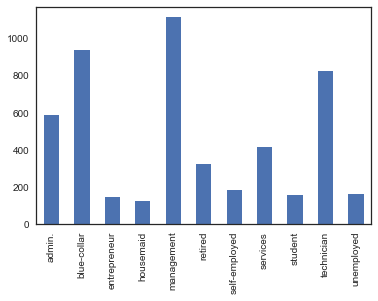

In [127]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



married     2898
single      1514
divorced     588
Name: Marital, dtype: int64
**************************************************


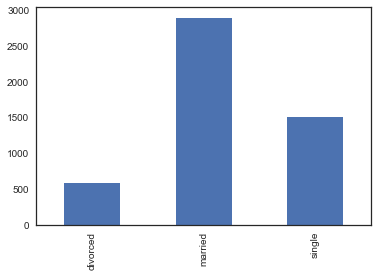

In [128]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Marital'].value_counts())
print ("*"*50)
df['Marital'].value_counts().sort_index().plot.bar()



secondary    2489
tertiary     1601
primary       694
Name: Education, dtype: int64
**************************************************


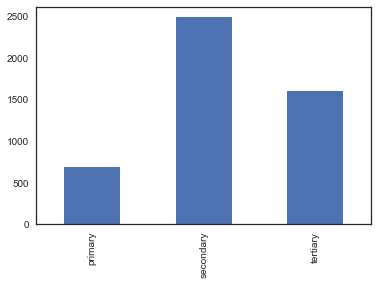

In [129]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Education'].value_counts())
print ("*"*50)
df['Education'].value_counts().sort_index().plot.bar()



0    4929
1      71
Name: Default, dtype: int64
**************************************************


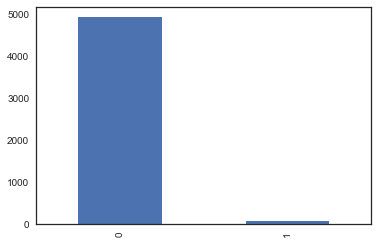

In [130]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Default'].value_counts())
print ("*"*50)
df['Default'].value_counts().sort_index().plot.bar()



**************************************************


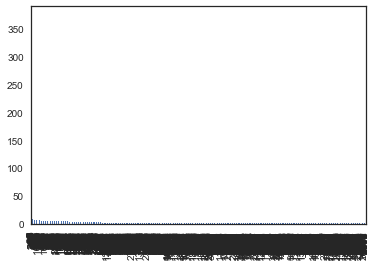

In [148]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
#print (df['Balance'].value_counts())
print ("*"*50)
df['Balance'].value_counts().plot.bar()



0    2516
1    2484
Name: HHInsurance, dtype: int64
**************************************************


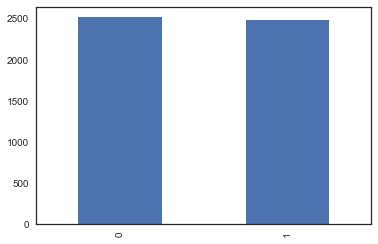

In [132]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['HHInsurance'].value_counts())
print ("*"*50)
df['HHInsurance'].value_counts().sort_index().plot.bar()



0    4347
1     653
Name: CarLoan, dtype: int64
**************************************************


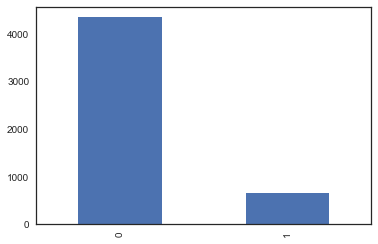

In [133]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['CarLoan'].value_counts())
print ("*"*50)
df['CarLoan'].value_counts().sort_index().plot.bar()



cellular     3529
telephone     348
Name: Communication, dtype: int64
**************************************************


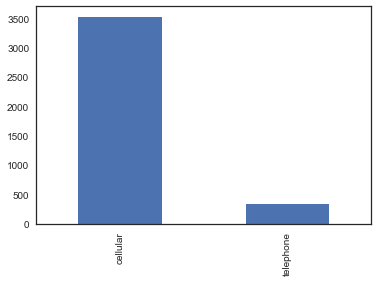

In [134]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Communication'].value_counts())
print ("*"*50)
df['Communication'].value_counts().sort_index().plot.bar()



18    252
20    249
21    213
15    207
13    207
30    204
17    201
5     197
8     194
7     191
6     190
12    189
19    183
11    178
4     175
28    174
29    170
2     167
9     166
14    165
16    153
26    128
27    122
3     115
25    111
23    111
22    110
10     89
31     71
24     60
1      58
Name: LastContactDay, dtype: int64
**************************************************


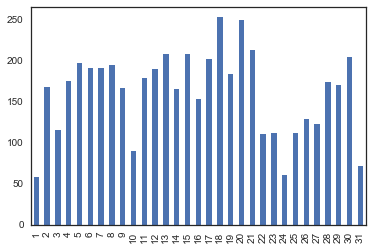

In [135]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['LastContactDay'].value_counts())
print ("*"*50)
df['LastContactDay'].value_counts().sort_index().plot.bar()



may    1318
jul     715
aug     664
jun     561
nov     420
apr     398
feb     332
jan     161
oct     153
sep     118
mar     110
dec      50
Name: LastContactMonth, dtype: int64
**************************************************


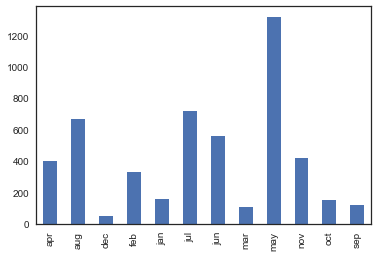

In [136]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['LastContactMonth'].value_counts())
print ("*"*50)
df['LastContactMonth'].value_counts().sort_index().plot.bar()



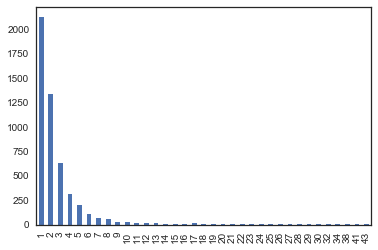

In [145]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
#print (df['NoOfContacts'].value_counts())
df['NoOfContacts'].value_counts().sort_index().plot.bar()



**************************************************


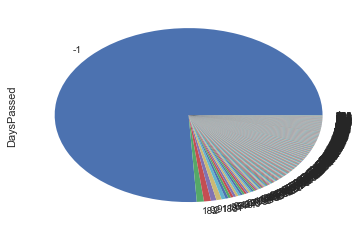

In [146]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
#print (df['DaysPassed'].value_counts())
print ("*"*50)
#df['DaysPassed'].value_counts().sort_index().plot.bar()
df['DaysPassed'].value_counts(normalize=True).plot(kind='pie')


management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64
**************************************************


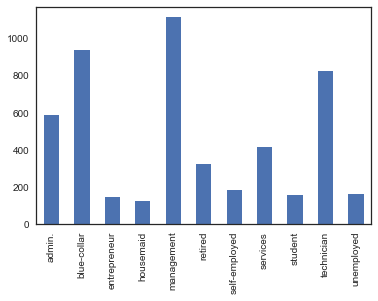

In [127]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



0     3799
1      412
2      300
3      163
4      106
5       76
6       32
7       27
8       24
10      14
9       12
12       9
11       6
13       5
14       5
19       4
20       1
16       1
18       1
30       1
58       1
23       1
Name: PrevAttempts, dtype: int64
**************************************************


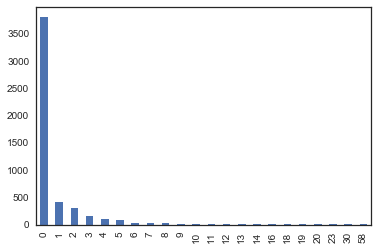

In [139]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['PrevAttempts'].value_counts())
print ("*"*50)
df['PrevAttempts'].value_counts().sort_index().plot.bar()



failure    548
success    405
other      248
Name: Outcome, dtype: int64
**************************************************


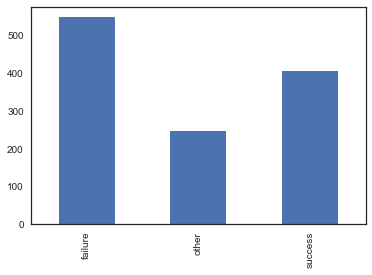

In [140]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Outcome'].value_counts())
print ("*"*50)
df['Outcome'].value_counts().sort_index().plot.bar()



management       1114
blue-collar       937
technician        823
admin.            586
services          414
retired           326
self-employed     182
unemployed        164
student           158
entrepreneur      149
housemaid         123
Name: Job, dtype: int64
**************************************************


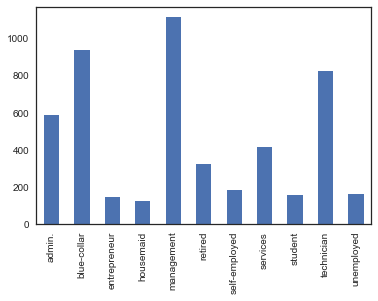

In [127]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['Job'].value_counts())
print ("*"*50)
df['Job'].value_counts().sort_index().plot.bar()



0.0    2396
1.0    1604
Name: CarInsurance, dtype: int64
**************************************************


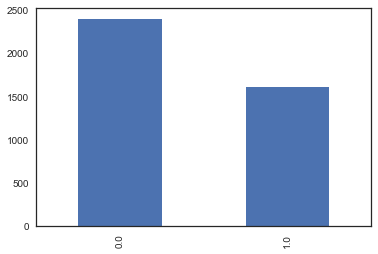

In [143]:
# Nombre 
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth	NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance
print (df['CarInsurance'].value_counts())
print ("*"*50)
df['CarInsurance'].value_counts().sort_index().plot.bar()



# Analyse / Visualisation Bivariée

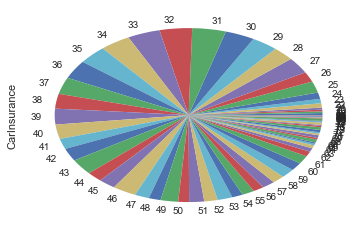

In [153]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['CarInsurance'].sum().plot(kind='pie')

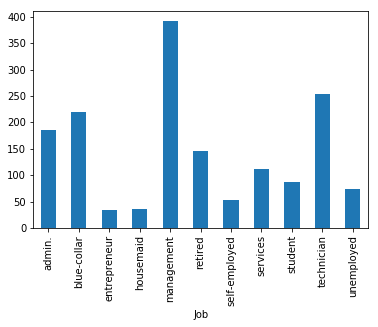

In [5]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Job')['CarInsurance'].sum().plot(kind='bar')

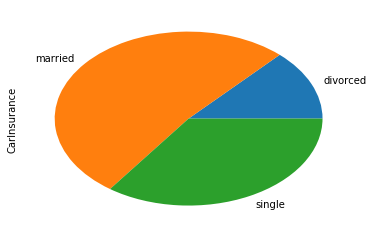

In [6]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Marital')['CarInsurance'].sum().plot(kind='pie')

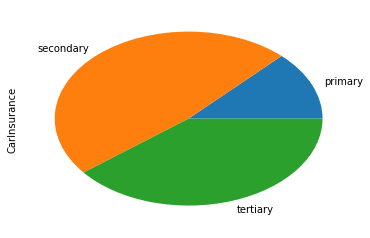

In [7]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Education')['CarInsurance'].sum().plot(kind='pie')

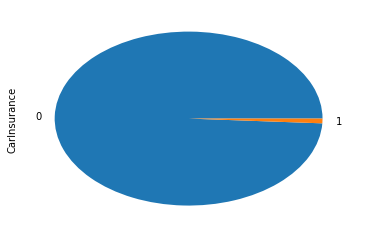

In [15]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Default')['CarInsurance'].sum().plot(kind='pie')

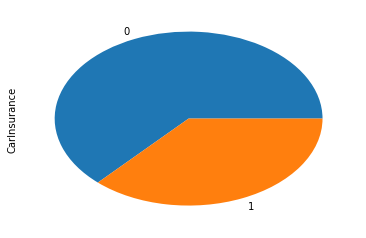

In [16]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('HHInsurance')['CarInsurance'].sum().plot(kind='pie')

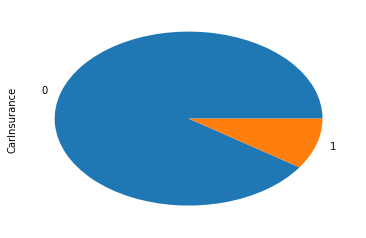

In [17]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CarLoan')['CarInsurance'].sum().plot(kind='pie')

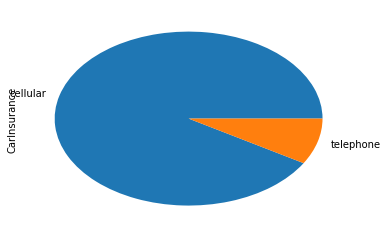

In [18]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Communication')['CarInsurance'].sum().plot(kind='pie')

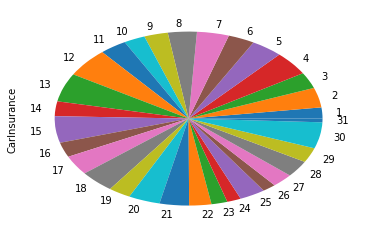

In [19]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('LastContactDay')['CarInsurance'].sum().plot(kind='pie')

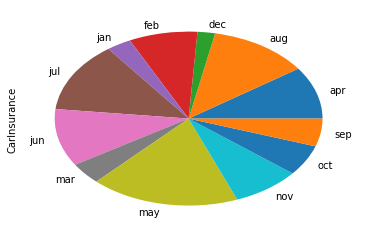

In [20]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('LastContactMonth')['CarInsurance'].sum().plot(kind='pie')

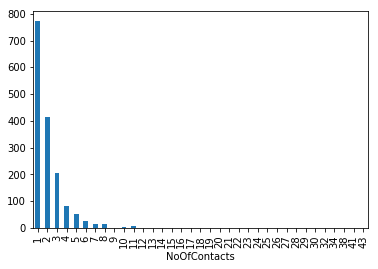

In [22]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('NoOfContacts')['CarInsurance'].sum().plot(kind='bar')

CarInsurance
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: DaysPassed, dtype: object

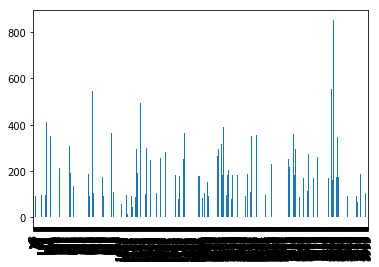

In [55]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CarInsurance')['DaysPassed'].plot(kind='bar')

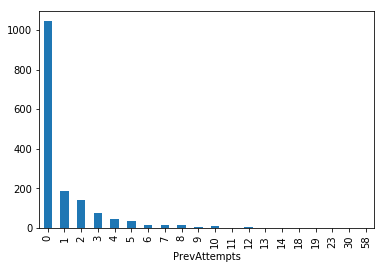

In [28]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('PrevAttempts')['CarInsurance'].sum().plot(kind='bar')

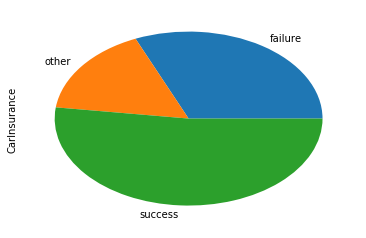

In [29]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Outcome')['CarInsurance'].sum().plot(kind='pie')

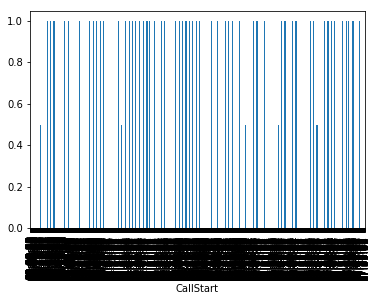

In [56]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CallStart')['CarInsurance'].mean().plot(kind='bar')

In [59]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('CarInsurance')['CallEnd'].sum().plot(kind='bar')

TypeError: Empty 'DataFrame': no numeric data to plot

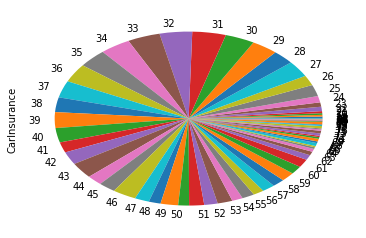

In [33]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['CarInsurance'].sum().plot(kind='pie')

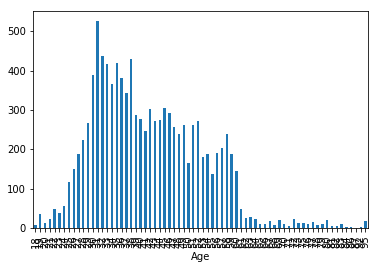

In [53]:
# Age	Job	Marital	Education	Default	Balance	HHInsurance	CarLoan	Communication	LastContactDay	LastContactMonth
# NoOfContacts	DaysPassed	PrevAttempts	Outcome	CallStart	CallEnd	CarInsurance

df.groupby('Age')['NoOfContacts'].sum().plot(kind='bar')

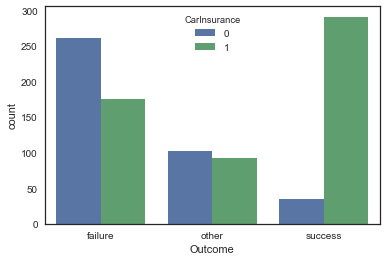

In [80]:
#résultats des campagnes précédentes
sns.countplot(x="Outcome",hue='CarInsurance',data=df);

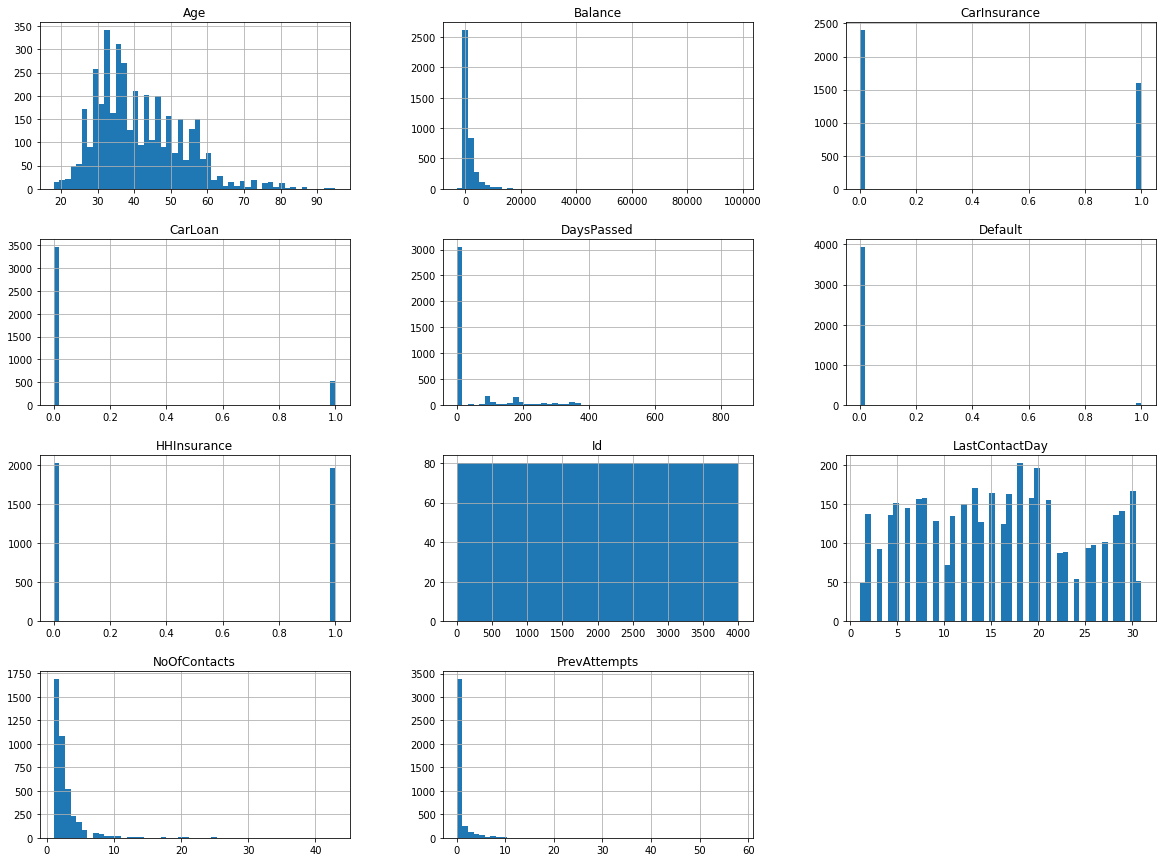

In [58]:
df.hist(bins=50, figsize=(20,15))
plt.show()

# Matrice de Corrélation:

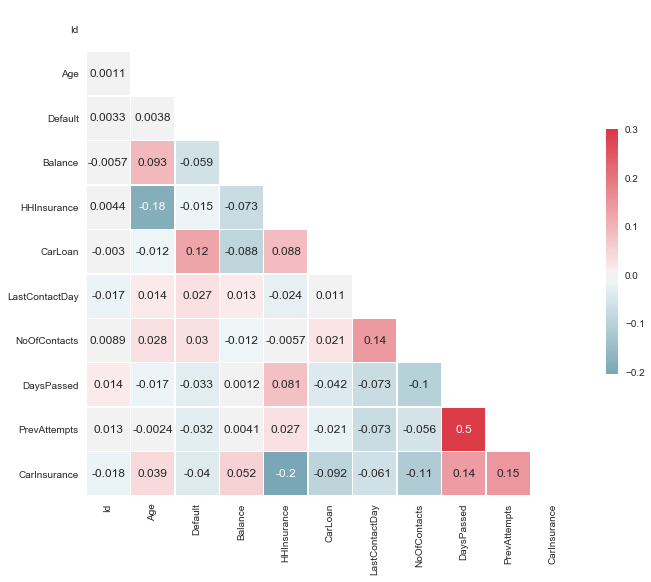

In [79]:
sns.set(style="white")
corr = df_new.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

#### RÉSULTATS APRES VISUALISATION DE DONNÉES
<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
La visualisation est un aspect important de Data Science sans lequel il est assez difficile de parvenir à un résultat. Même si le résultat est déterminé par des tableaux, l'analyse de chaque valeur et sa conclusion sont pénibles. Les graphiques / graphiques sont très utiles pour accomplir ces tâches facilement, même à une personne non technique. Les cadres et les gestionnaires aiment regarder un rapport avec la visualisation afin de pouvoir facilement prendre des décisions complexes.Bowow est une représentation en paire qui couple les champs d’intérêt et les trace. Les variables de la représentation en paire sont sélectionnées dans la carte thermique, ce qui a une incidence sur les résultats.

**Points à retenir depuis la matrice de corrélation:**

* Les personnes âgées sont plus susceptibles de souscrire une assurance auto.
* Les personnes ayant déjà souscrit une assurance automobile ou une assurance habitation sont moins susceptibles d’acheter.
* Les gens donnent un signe positif si les jours passent (le temps avant qu'ils aient été contactés) augmente.
* Lorsque vous contactez fréquemment des personnes, leur tendance d'achat augmente après 20 contacts ou plus.
* Le nombre de contacts et de tentatives précédentes fonctionne de la même manière, plus il est avantageux d’augmenter l’achat d’assurance automobile.
 </span>

# ########## PRETRAITEMENT DES DONNÉES ################################

# Les Valeurs Abérantes:

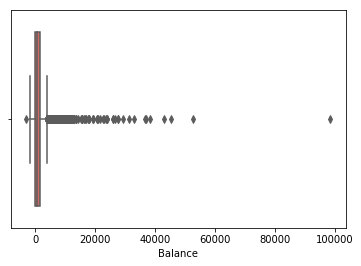

In [61]:
# Plotting Balance 
sns.boxplot(x='Balance',data=df,palette='hls')

In [62]:
# La valueur Maximale dans la série "Balance"
df.Balance.max()


98417

In [63]:
df[df['Balance'] == 98417]


,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
1742,1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [84]:
# Supprimer l'enregistrement de la valeur abérante
df_new = df.drop(df.index[1742])

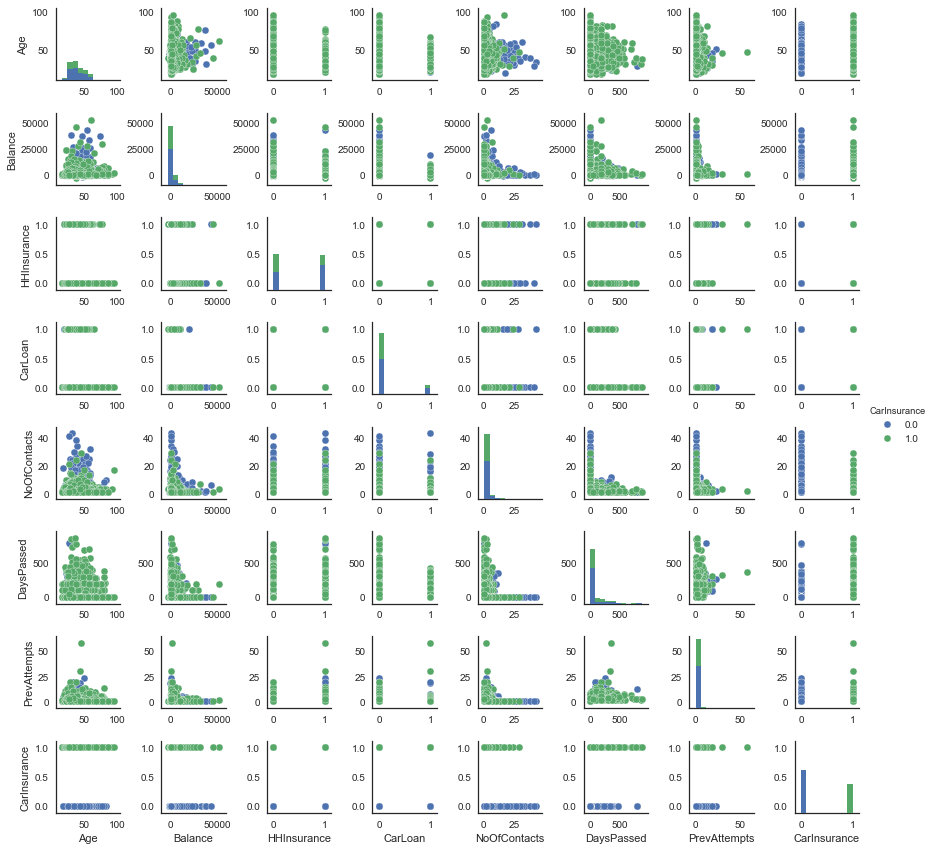

In [95]:
# Matrice Chaleurs:
df_sub = ['Age','Balance','HHInsurance', 'CarLoan','NoOfContacts','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(df_new[df_sub],hue='CarInsurance',size=1.5);

Pairplot nous aide à visualiser les relations entre les variables CarInsurance, Balance et Categoriques telles que l’éducation, l’état matrimonial et l’emploi.
- Les étudiants et les retraités ont acheté le plus grand nombre d'assurances auto.


# Les Valeurs Manquantes:

In [65]:
df.isnull().sum()

Id                     0
Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [76]:
# Nombre total des valeurs manquantes:
print(df.isnull().sum().sum())

4132


<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">  
- Dans notre cas, beaucoup de valeurs manquantes apparaissent principalement dans les champs Outcome et Communication. 
- Job et Education ont aussi une quantité considérable de valeurs manquantes.
</span>

In [75]:
#df[df['Job'] == 'NaN']#[0:5]
df['Job'][20:35]

20    blue-collar
21        retired
22     management
23        retired
24     technician
25     management
26     management
27            NaN
28       services
29    blue-collar
30     technician
31         admin.
32        retired
33     management
34    blue-collar
Name: Job, dtype: object

In [77]:
# Traiter les valeurs manquantes dans les séries Job et Education, avec la valeur précédente:
df_new['Job'] = df_new['Job'].fillna(method ='pad')
df_new['Education'] = df_new['Education'].fillna(method ='pad')

In [78]:
# Traiter les valeurs manquantes dans les séries Communication et Outcome
df_new['Communication'] = df_new['Communication'].fillna('none')
df_new['Outcome'] = df_new['Outcome'].fillna('none')

In [93]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


# Table Pivot

In [140]:
#df_pivot = df.pivot_table(values = 'Balance', columns = 'Outcome', index = ['Marital', 'Communication','CarInsurance'])

df_pivot = df.pivot_table(values = 'CarLoan', columns = 'LastContactMonth', index = ['Marital','Education','CarInsurance'], aggfunc='sum')


In [141]:
df_pivot

LastContactMonth                 apr   aug  dec  feb  jan   jul   jun  mar  \
Marital  Education CarInsurance                                              
divorced primary   0             0.0   0.0  0.0  0.0  0.0   6.0   0.0  0.0   
                   1             0.0   0.0  NaN  0.0  0.0   0.0   0.0  0.0   
         secondary 0             2.0   2.0  0.0  1.0  1.0  10.0   0.0  NaN   
                   1             0.0   1.0  0.0  2.0  0.0   4.0   0.0  1.0   
         tertiary  0             0.0   2.0  NaN  0.0  2.0   3.0   1.0  0.0   
                   1             0.0   0.0  0.0  0.0  0.0   1.0   0.0  0.0   
married  primary   0             3.0   4.0  NaN  1.0  1.0  11.0   5.0  0.0   
                   1             1.0   0.0  0.0  0.0  0.0   4.0   1.0  0.0   
         secondary 0             6.0  11.0  0.0  7.0  1.0  46.0  19.0  0.0   
                   1             3.0   1.0  0.0  3.0  0.0  16.0   4.0  1.0   
         tertiary  0             2.0   3.0  0.0  1.0  3.0  19.0   7.0  0.0   
                   1             1.0   4.0  0.0  3.0  0.0   3.0   4.0  0.0   
single   primary   0             0.0   0.0  NaN  0.0  0.0   1.0   0.0  NaN   
                   1             0.0   0.0  NaN  0.0  NaN   3.0   0.0  NaN   
         secondary 0             4.0   2.0  0.0  6.0  3.0  19.0   4.0  0.0   
                   1             3.0   0.0  0.0  0.0  2.0  10.0   2.0  0.0   
         tertiary  0             0.0   1.0  0.0  0.0  3.0   5.0   2.0  NaN   
                   1             2.0   4.0  0.0  1.0  0.0   3.0   0.0  0.0   

LastContactMonth                  may   nov  oct  sep  
Marital  Education CarInsurance                        
divorced primary   0              2.0   0.0  NaN  NaN  
                   1              3.0   0.0  0.0  0.0  
         secondary 0              4.0   2.0  2.0  0.0  
                   1              3.0   2.0  2.0  0.0  
         tertiary  0              1.0   1.0  NaN  0.0  
                   1              1.0   0.0  0.0  0.0  
married  primary   0              8.0   4.0  NaN  0.0  
                   1              3.0   1.0  0.0  0.0  
         secondary 0             44.0  16.0  0.0  0.0  
                   1             10.0   4.0  1.0  0.0  
         tertiary  0             11.0  11.0  0.0  0.0  
                   1              5.0   1.0  0.0  0.0  
single   primary   0              3.0   1.0  NaN  NaN  
                   1              2.0   1.0  NaN  NaN  
         secondary 0             17.0   2.0  0.0  0.0  
                   1             13.0   1.0  2.0  1.0  
         tertiary  0              5.0   3.0  1.0  0.0  
                   1              4.0   0.0  1.0  0.0

In [143]:
#df_pivot.reset_index(drop=False,inplace=False).melt(id_vars=['Marital'],value_vars=df_pivot.columns.tolist())

# ############ FEATURE ENGINEERING ####################

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


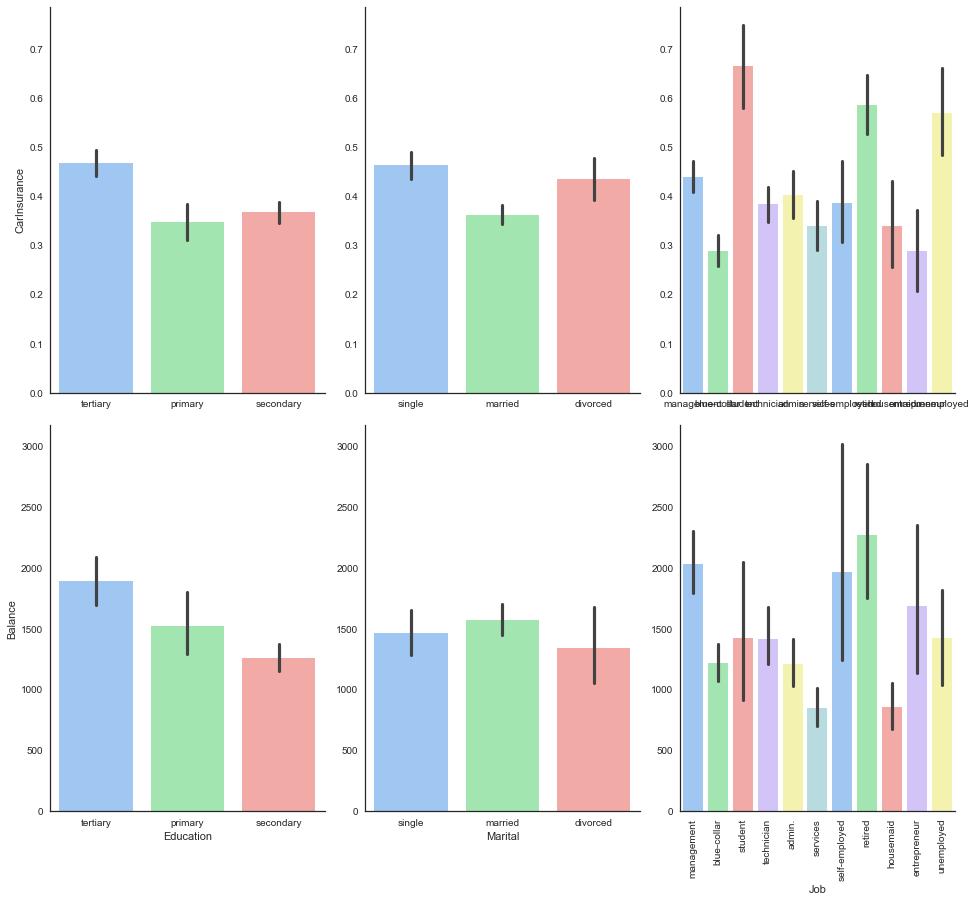

In [106]:
#Utiliser plusieurs variables x et y pour former une grille de paires de valeurs catégoriques
g = sns.PairGrid(df_new,
                 x_vars=["Education","Marital", "Job"],
                 y_vars=["CarInsurance", "Balance"],
                 aspect=.75, size=6)
plt.xticks(rotation=90)
g.map(sns.barplot, palette="pastel");

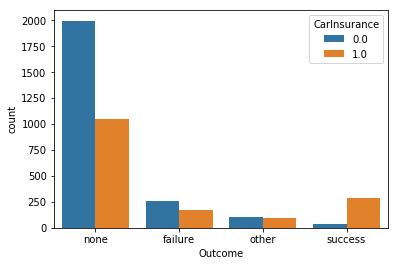

In [32]:
#résultats des campagnes précédentes
sns.countplot(x="Outcome",hue='CarInsurance',data=df_new);

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">**LES DESCRIPTEURS IMPORTANTS**

<span style="color: black; font-family: Malgun Gothic; font-size: 14px;">
Il peut être très utile de savoir quelle caractéristique joue un rôle majeur dans la détermination du résultat et d’aider à les améliorer.
la sortie de la solution. Trouver les caractéristiques importantes est très utile pour prendre des décisions et des conclusions importantes.
L'identification des fonctionnalités importantes est réalisée à l'aide de modèles tels que les arborescences de régression logistique et de décision.
Les deux fournissent une très bonne clarté dans l'identification des caractéristiques. Le graphique ci-dessous montre les caractéristiques les plus importantes déterminées par le
ExtraTreesClassifier et les 10 principales fonctionnalités sont:
    
1. CallTime
2. LastContactDay
3. Balance
4. NoofContacts
5. Outcome_success
6. Age
7. HHInsurance
8. Communication_none
9. Dayspassed
10. Outcome_none

<span>

# #############################################

In [80]:
# Reading Csv file
#dftrain = pd.read_csv(path+'carInsurance_train.csv', sep=',', encoding='utf8')


In [30]:
dftrain.set_index('Id')
dftrain.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [37]:
# Using ExtraTreesClassifier model function
# Printing important features in the model

X= df.drop(['CarInsurance'], axis=1)
y= df['CarInsurance'] 

print(X.head())
print('*'*50)
print(y.head())

   Id  Age          Job  Marital Education  Default  Balance  HHInsurance  \
0   1   32   management   single  tertiary        0     1218            1   
1   2   32  blue-collar  married   primary        0     1156            1   
2   3   29   management   single  tertiary        0      637            1   
3   4   25      student   single   primary        0      373            1   
4   5   30   management  married  tertiary        0     2694            0   

   CarLoan Communication  LastContactDay LastContactMonth  NoOfContacts  \
0        0     telephone              28              jan             2   
1        0           NaN              26              may             5   
2        0      cellular               3              jun             1   
3        0      cellular              11              may             2   
4        0      cellular               3              jun             1   

   DaysPassed  PrevAttempts  Outcome CallStart   CallEnd  
0          -1             0

In [45]:
df.columns.tolist()

['Id',
 'Age',
 'Job',
 'Marital',
 'Education',
 'Default',
 'Balance',
 'HHInsurance',
 'CarLoan',
 'Communication',
 'LastContactDay',
 'LastContactMonth',
 'NoOfContacts',
 'DaysPassed',
 'PrevAttempts',
 'Outcome',
 'CallStart',
 'CallEnd',
 'CarInsurance']

In [51]:
df._get_numeric_data().columns

Index(['Id', 'Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan',
       'LastContactDay', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'CarInsurance'],
      dtype='object')

In [59]:
df._get_object_data().columns

AttributeError: 'DataFrame' object has no attribute '_get_object_data'

In [57]:
df.select_dtypes(["object_"])

,Job,Marital,Education,Communication,LastContactMonth,Outcome,CallStart,CallEnd
0,management,single,tertiary,telephone,jan,NaN,13:45:20,13:46:30
1,blue-collar,married,primary,NaN,may,NaN,14:49:03,14:52:08
2,management,single,tertiary,cellular,jun,failure,16:30:24,16:36:04
3,student,single,primary,cellular,may,NaN,12:06:43,12:20:22
4,management,married,tertiary,cellular,jun,NaN,14:35:44,14:38:56
5,technician,single,tertiary,cellular,may,failure,14:58:08,15:11:24
6,admin.,single,tertiary,cellular,mar,NaN,13:00:02,13:03:17
7,management,divorced,tertiary,NaN,may,NaN,15:39:43,15:40:49
8,admin.,married,secondary,cellular,nov,NaN,12:20:56,12:22:42
9,blue-collar,married,secondary,cellular,may,NaN,09:22:20,09:27:46


In [50]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

names =df.columns.tolist()

array = df._get_numeric_data().values
X = array[:,0:17]
y = array[:,18]
# feature extraction
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)
#print(model.feature_importances_)

IndexError: index 18 is out of bounds for axis 1 with size 11

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
importances = model.feature_importances_
feat_names = df.drop(['CarInsurance'],axis=1).columns

model.fit(X, y)
print(model.feature_importances_)


NotFittedError: This ExtraTreesClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [40]:
# Displaying the feature importances as a chart by sorting it in the order of importances
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

NameError: name 'importances' is not defined

In [ ]:
CONNECTING THE DOTS

- df.to_csv('myDataFrame.csv', sep='\t', encoding='utf-8')
- df.to_excel('myDataFrame.csv', encoding='utf-8')

nous concluons que le taux d'acceptation de l' assurance automobile offerte pour les personnes mariées est différent du taux d'acceptation pour les personnes non mariées 

In [ ]:
df[‘age’].fillna(value=df[‘age’].mean())